In [4]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG, plot_boxplot_fitness_hue
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


logger = ExperimentLogger('../results/kerneltuner-o4-mini', True)
#logger.add_read_dir('../results/kerneltuner-o4')
#logger.add_read_dir('../results/kerneltuner-o4-no-info')

In [5]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LLaMEA-o4-mini']
['gemm-no-info', 'hotspot', 'dedispersion', 'convolution-no-info', 'hotspot-no-info', 'gemm', 'convolution', 'dedispersion-no-info']


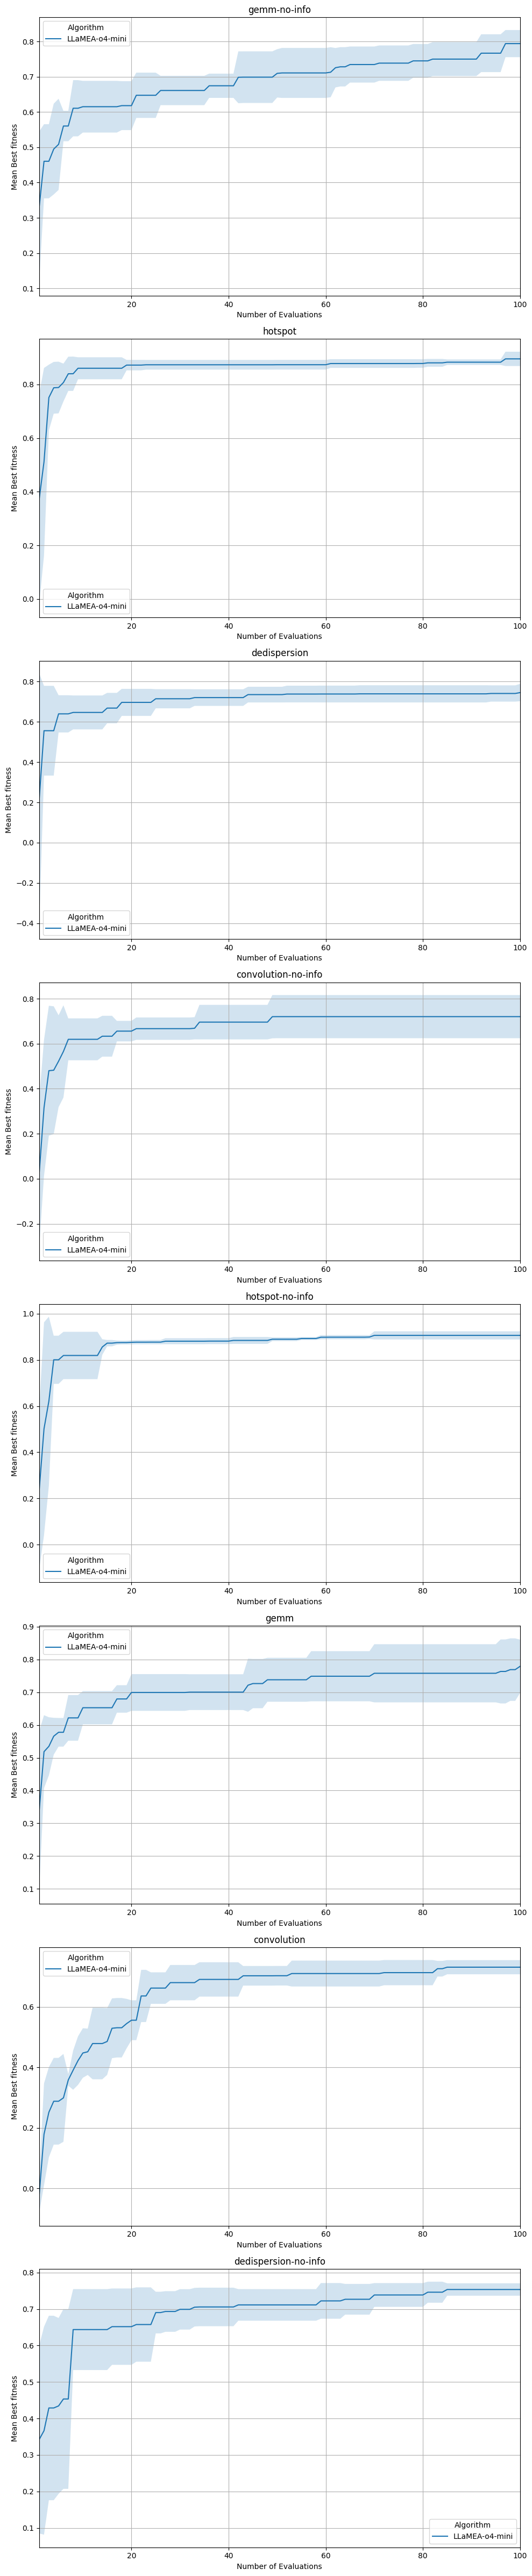

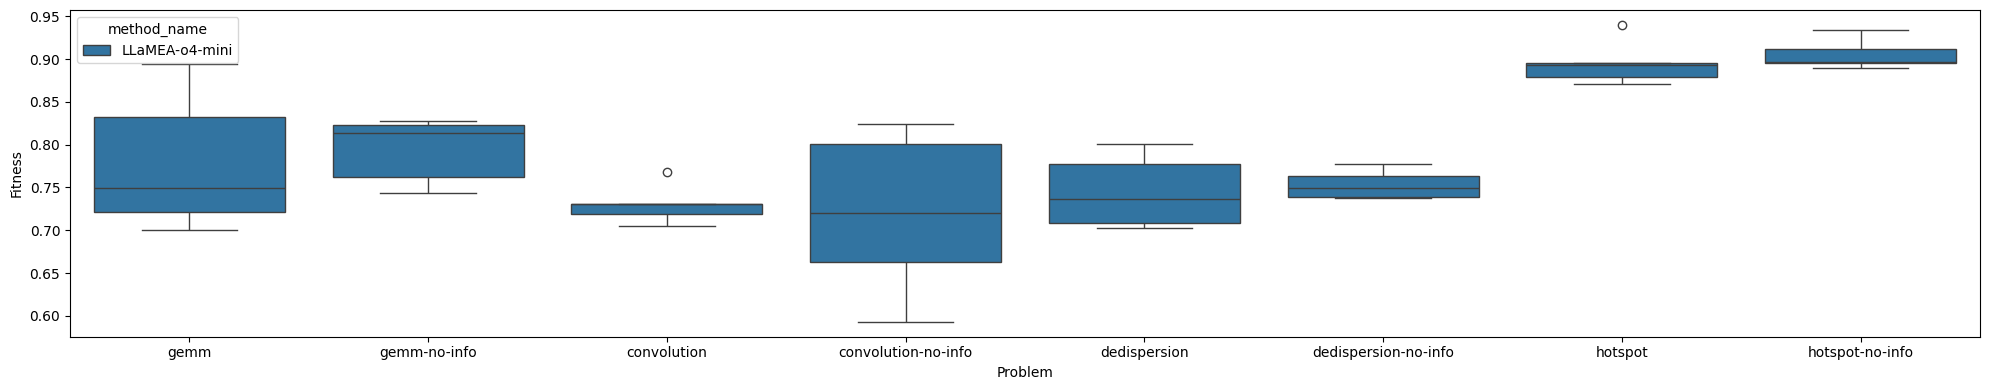

gemm-no-info 496 HierarchicalBanditVNS LLaMEA-o4-mini
hotspot 396 ThompsonVNS LLaMEA-o4-mini
dedispersion 299 HybridVNDX LLaMEA-o4-mini
convolution-no-info 248 TabuHarmonySearch LLaMEA-o4-mini
hotspot-no-info 169 AdaptiveLevySA LLaMEA-o4-mini
gemm 95 AdaptiveTabuGreyWolf LLaMEA-o4-mini
convolution 452 PRTS LLaMEA-o4-mini
dedispersion-no-info 107 AdaptiveBanditNeighborhoodSearch LLaMEA-o4-mini


In [6]:

plot_convergence(logger, metric="fitness", save=False, budget=100)
plot_boxplot_fitness_hue(logger)

method_names = {"LLaMEA-o4-mini": "LLaMEA-o4-mini",
                "o4-mini": "o4-mini",
                "o4 (no info)": "o4-no-info"}

for problem in problems:
    data = logger.get_problem_data(problem_name=problem)
    for method in methods:
        # first on method
        method_data = data[data['method_name'] == method].copy().reset_index()
        idx = method_data['fitness'].idxmax()
        print(problem, idx, method_data.iloc[idx]['name'], method)
        with open(f'../results/kerneltuner-o4-mini/alg-{problem}-{method_names[method]}.py', 'w', encoding='utf-8') as f:
            f.write(method_data.iloc[idx]['code'])

